In [1]:
from shapely.geometry import Polygon, MultiPolygon, Point, LineString, GeometryCollection
import matplotlib.pyplot as plt
import numpy as np

In [4]:
goal = MultiPolygon([
    Polygon([
        (0, 6),
        (0, 10),
        (4, 10),
        (4, 6),
    ]),
    Polygon([
        (6, 6),
        (6, 10),
        (10, 10),
        (10, 6),
    ])
])

obstacles = MultiPolygon([
    Polygon([
        (0, 5.5),
        (0, 6),
        (4.5, 6),
        (4.5, 5.5),
    ]),
    Polygon([
        (5.5, 5.5),
        (5.5, 6),
        (10, 6),
        (10, 5.5),
    ])
])

death = MultiPolygon([
    Polygon([
        (8, 0),
        (8, 2),
        (10, 2),
        (10, 0)
    ])
])

robot = Point(2, 2).buffer(0.5)

# path = Polygon([
#     (-2.5, -2),
#     (1.3, 3),
#     (1.8, 3),
#     (-2, -2),
# ])

In [15]:
def render_env(room_size: list, 
               obstacles: MultiPolygon, 
               death: MultiPolygon,
               goal: MultiPolygon,
               robot: Polygon) -> np.array:
    """Plots environment to screen or to numpy array

    Args:
        room_size (list[float]): 2D list of room length in [x, y] format
        obstacles (MultiPolygon): Multipolygon describing obstacles
        death (MultiPolygon): MultiPolygon describing death tiles
        goal (MultiPolygon): MultiPolygon describing goal tiles
        robot (Polygon): Robot Polygon

    Returns:
        np.array: Image of environment
    """

    def plot_multipolygon(multipolygon: MultiPolygon, color: str, axes) -> None:
        """Plots MultiPolygon in `color`
        """
        for polygon in multipolygon.geoms:
            axes.fill(*polygon.exterior.xy, fc=color)

    # Initialize plot
    resolution = 256
    dpi = 10
    fig = plt.figure(figsize=(resolution/dpi, resolution/dpi), dpi=dpi)
    axes = fig.add_axes([0.,0.,1.,1.])
    
    # axes.set_aspect("equal")
    axes.set_xticklabels([])
    axes.set_xticks([])
    axes.set_yticklabels([])
    axes.set_yticks([])
    axes.margins(x=0, y=0)

    # Plot room background
    axes.set_xlim((-0.5, room_size[0]+0.5))
    axes.set_ylim((-0.5, room_size[1]+0.5))
    axes.set_facecolor("black")
    axes.fill(
        [0, 0, room_size[0], room_size[0], 0],
        [0, room_size[1], room_size[1], 0, 0],
        fc="white"
    ) 

    # Plot obstacles, death tiles and goal tiles
    plot_multipolygon(obstacles, "black", axes)
    plot_multipolygon(goal, "orange", axes)
    plot_multipolygon(death, "red", axes)

    # Plot robot
    axes.fill(*robot.exterior.xy, fc="blue")

    # Output to numpy array
    fig.canvas.draw()
    image = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)
    image = image.reshape((*fig.canvas.get_width_height()[::-1], 3))
    fig.show()

    # Save to disk
    # cv2.imwrite("test.png", render_env([10, 10], obstacles, death, goal, robot))

    return image[:, :, ::-1]

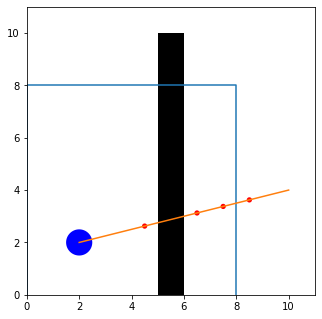

In [16]:
wall = GeometryCollection([
    Polygon([
        [5, 0],
        [5, 10],
        [6, 10],
        [6, 0]
    ]),
    LineString([
        [0, 0],
        [0, 8],
        [8, 8],
        [8, 0]
    ])
])

robot = Point(2, 2)

dir = Point(8, 2)

new_robot = Point(robot.x + dir.x, robot.y + dir.y)

movement_path = LineString([robot, new_robot])


fig = plt.figure(figsize=(4, 4))
axes = fig.add_axes([0.,0.,1.,1.])
plt.xlim((0, 11))
plt.ylim((0, 11))

for geometry in wall.geoms:
    if hasattr(geometry, "exterior"): # polygon
        axes.fill(*geometry.exterior.xy, fc="black")
    elif hasattr(geometry, "boundary"): # line
        axes.plot(*geometry.xy)
axes.plot(*movement_path.xy)
axes.fill(*robot.buffer(0.5).exterior.xy, fc="blue")

intersect = movement_path.intersection(wall.buffer(0.5))

for point in intersect.boundary.geoms:  
    axes.fill(*point.buffer(0.1).exterior.xy, fc="red")

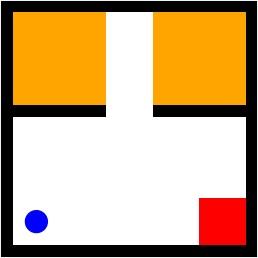

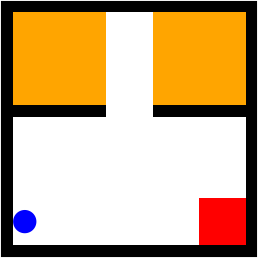

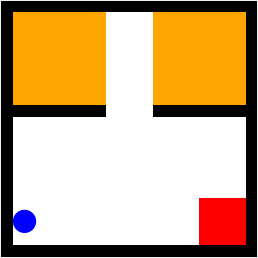

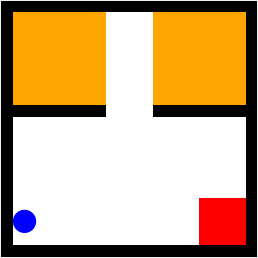

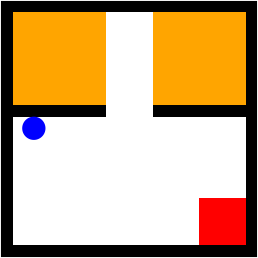

In [4]:
from continuous_environment import Grid, Robot
from shapely.geometry import Point
grid = Grid(
    configFile="example-env.json", 
    robots=[
        Robot(id=1, radius=0.5, color="blue", batteryLevel=100)
    ],
    startingPos=[
        [1, 1]
    ]
)
output = grid.plot_grid(256, True, True)
grid.robots[0].move(Point(-0.5, 0), 0)
output = grid.plot_grid(256, True, True)
grid.robots[0].move(Point(-10, 10), 0)
output = grid.plot_grid(256, True, True)
grid.robots[0].move(Point(0, 5), 0)
output = grid.plot_grid(256, True, True)
grid.robots[0].move(Point(1,10), 0)
output = grid.plot_grid(256, True, True)

In [4]:
Point(2, 2).intersection(Point(3, 4)).is_empty

True

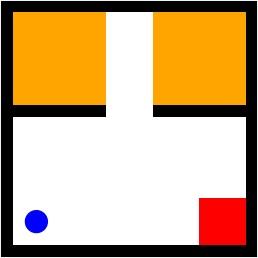

POINT (3.2 4)


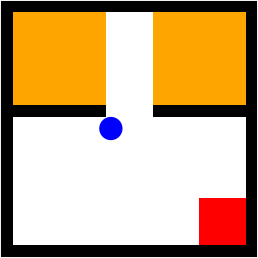

POINT (0.8 0)


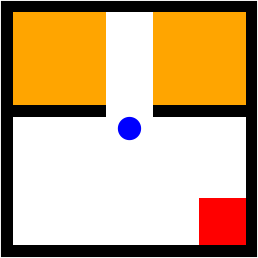

POINT (0 1.5)


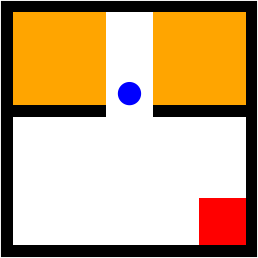

POINT (1.5 1)


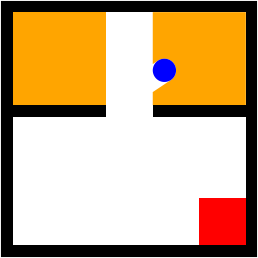

POINT (-2.5 1.5)


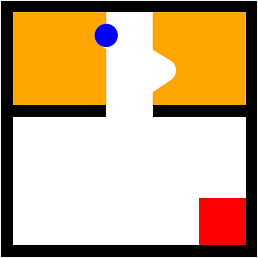

POINT (-2 -2)


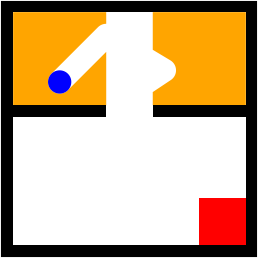

POINT (3 -0.5)


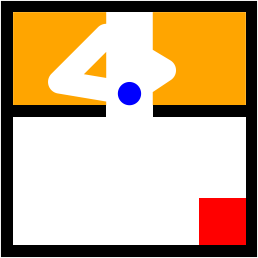

POINT (3.5 2)


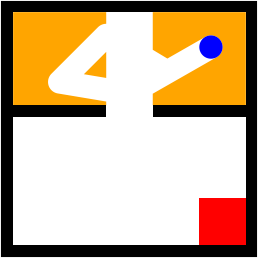

POINT (-4 0)


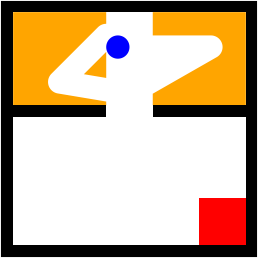

POINT (1 -4)


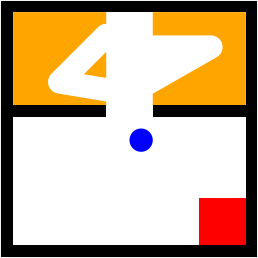

POINT (1.5 -1.5)


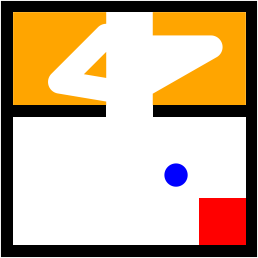

POINT (1.5 -1.5)


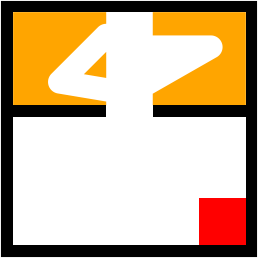

POINT (1.5 -1.5)


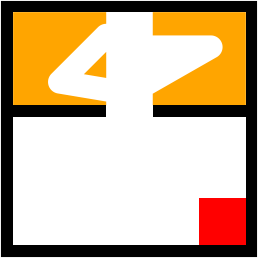

In [25]:
from continuous_environment import Grid, Robot
from shapely.geometry import Point
grid = Grid(
    configFile="example-env.json", 
    robots=[
        Robot(id=1, radius=0.5, color="blue")
    ],
    startingPos=[
        [1, 1]
    ]
)

output = grid.plot_grid(256, True, True)
grid.robots[0].move(Point(3.2, 4), 0)
output = grid.plot_grid(256, True, True)
grid.robots[0].move(Point(0.8, 0), 0)
output = grid.plot_grid(256, True, True)
grid.robots[0].move(Point(0, 1.5), 0)
output = grid.plot_grid(256, True, True)
grid.robots[0].move(Point(1.5, 1), 0)
output = grid.plot_grid(256, True, True)
grid.robots[0].move(Point(-2.5, 1.5), 0)
output = grid.plot_grid(256, True, True)
grid.robots[0].move(Point(-2, -2), 0)
output = grid.plot_grid(256, True, True)
grid.robots[0].move(Point(3, -0.5), 0)
output = grid.plot_grid(256, True, True)
grid.robots[0].move(Point(3.5, 2), 0)
output = grid.plot_grid(256, True, True)
grid.robots[0].move(Point(-4, 0), 0)
output = grid.plot_grid(256, True, True)
grid.robots[0].move(Point(1, -4), 0)
output = grid.plot_grid(256, True, True)
grid.robots[0].move(Point(1.5, -1.5), 0)
output = grid.plot_grid(256, True, True)
grid.robots[0].move(Point(1.5, -1.5), 0)
output = grid.plot_grid(256, True, True)
grid.robots[0].move(Point(1.5, -1.5), 0)
output = grid.plot_grid(256, True, True)

In [4]:
a = MultiPolygon([
    LineString([
        [0.9, 5],
        [1.05, 6.5]
    ]),
    LineString([
        [1.35, 9.5],
        [1.45, 10.5]
    ]),
    Point(0.5, 1)
])

In [15]:
from shapely.geometry.base import BaseMultipartGeometry
from shapely.geometry import MultiLineString, MultiPoint, Polygon, LineString, MultiPolygon, GeometryCollection

In [23]:
LineString([[2, 2], [3, 3]]).length

1.4142135623730951

In [16]:
Point(0, 0).distance(LineString([[2, 2], [3, 3]]))

2.8284271247461903

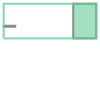

In [20]:
a = Polygon([
    [3, 0],
    [3, 1.5],
    [4, 1.5],
    [4, 0]
])

c = Polygon([
    [0, 0.5],
    [0, 0.55],
    [0.5, 0.55],
    [0.5, 0.5]
])


b = LineString([
    [0, 0],
    [0, 1.5],
    [4, 1.5],
    [4, 0],
    [0, 0]
])

GeometryCollection([a, c, b])


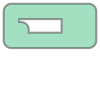

In [21]:
GeometryCollection([a, c, b]).buffer(0.4)

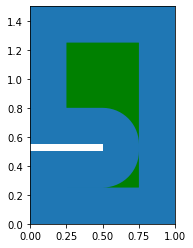

In [80]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots()
axes.set_aspect("equal")
plt.xlim((0, 1))
plt.ylim((0, 1.5))

axes.fill(*(a-c).exterior.xy)
axes.fill(*(a-c).buffer(-0.24999, join_style=2).buffer(0.24999).buffer(-0.24999).exterior.xy, fc="green")

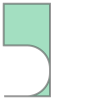

In [69]:
(a-c).buffer(-0.24999, join_style=2).buffer(0.24999).buffer(-0.24999)

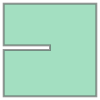

In [49]:
(a-c)

In [84]:
a = MultiPoint([MultiPoint([Point(1, 2)])])
len(a.geoms)
print(a)

c:\Users\Max.van.den.Hoven\Anaconda3\envs\DIC\lib\site-packages\shapely\geometry\multipoint.py:191: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  n = len(ob[0])


AssertionError: 

In [23]:
[Point(coord) for coord in a.geoms[0].coords]

In [18]:
isinstance(MultiLineString(), BaseMultipartGeometry)

True

In [28]:
[(point for point in geom.boundary.geoms if isinstance(geom, LineString) else geom) for geom in a.geoms ]

SyntaxError: invalid syntax (4153881943.py, line 1)

In [92]:
import numpy as np

distances = [3., 2., 1., 0., 2., 1.]

dist_np = np.array(distances)

dist_np += (dist_np <= 0)*9999

dist_np

array([3.000e+00, 2.000e+00, 1.000e+00, 9.999e+03, 2.000e+00, 1.000e+00])